grouping villages by population in mapping python gis

https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f

https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-statistics/how-grouping-analysis-works.htm

https://gis.stackexchange.com/questions/306547/cluster-points-into-evenly-numbered-groups

https://gis.stackexchange.com/questions/123289/grouping-village-points-based-on-distance-and-population-size-using-arcmap/123297#123297

https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

https://gis.utah.gov/

In [ ]:
pip install pyshp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 3.5 MB/s eta 0:00:00


In [ ]:
pip install shapefile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement shapefile (from versions: none)
ERROR: No matching distribution found for shapefile


In [ ]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import json

# Define the GeoJSON data
data = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "geometry": {
                "type": "Polygon",
                "coordinates": [[[-97.5, 26.5], [-97.5, 30.5], [-93.5, 30.5], [-93.5, 26.5], [-97.5, 26.5]]]
            },
            "properties": {
                "district_id": 1,
                "district_name": "District 1"
            }
        },
        {
            "type": "Feature",
            "geometry": {
                "type": "Polygon",
                "coordinates": [[[-97.5, 26.5], [-97.5, 30.5], [-93.5, 30.5], [-93.5, 26.5], [-97.5, 26.5]]]
            },
            "properties": {
                "district_id": 2,
                "district_name": "District 2"
            }
        }
    ]
}

{
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "geometry": {
                "type": "Polygon",
                "coordinates": [
                    [
                        [-106.0, 25.0],
                        [-93.0, 25.0],
                        [-93.0, 36.0],
                        [-106.0, 36.0],
                        [-106.0, 25.0]
                    ]
                ]
            },
            "properties": {
                "DISTRICT": "1",
                "DISTRICT_N": "District 1"
            }
        },
        {
            "type": "Feature",
            "geometry": {
                "type": "Polygon",
                "coordinates": [
                    [
                        [-106.0, 25.0],
                        [-93.0, 25.0],
                        [-93.0, 30.0],
                        [-106.0, 30.0],
                        [-106.0, 25.0]
                    ]
                ]
            },
            "properties": {
                "DISTRICT": "2",
                "DISTRICT_N": "District 2"
            }
        },
        {
            "type": "Feature",
            "geometry": {
                "type": "Polygon",
                "coordinates": [
                    [
                        [-106.0, 30.0],
                        [-93.0, 30.0],
                        [-93.0, 36.0],
                        [-106.0, 36.0],
                        [-106.0, 30.0]
                    ]
                ]
            },
            "properties": {
                "DISTRICT": "3",
                "DISTRICT_N": "District 3"
            }
        }
    ]
}

import json

# Create an empty list to store the feature objects
features = []

# Loop through the districts
for i in range(1, 11):
    # Create a feature object for the district
    feature = {
        "type": "Feature",
        "geometry": {
            "type": "Polygon",
            "coordinates": [
                [
                    [-106.0, 25.0],
                    [-93.0, 25.0],
                    [-93.0, 36.0],
                    [-106.0, 36.0],
                    [-106.0, 25.0]
                ]
            ]
        },
        "properties": {
            "DISTRICT": str(i),
            "DISTRICT_N": "District {}".format(i)
        }
    }
    # Add the feature object to the list
    features.append(feature)

# Create the GeoJSON data structure
geojson = {
    "type": "FeatureCollection",
    "features": features
}

# Convert the GeoJSON data structure to a JSON string
json_data = json.dumps(geojson)

# Write the


# Save the data to a file
with open("texas_voting_districts.geojson", "w") as f:
    json.dump(data, f)

In [ ]:
pip install fiona

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 60.5 MB/s eta 0:00:00


In [ ]:
import fiona
import shapefile as shp

# Read in the GeoJSON file
f = fiona.open("texas_voting_districts.geojson", "r")
data = f

# Define the shapefile schema
schema = {
    'geometry': 'Polygon',
    'properties': {
        'district_id': 'int',
        'district_name': 'str'
    }
}

# Create the shapefile
shapefile = fiona.open("texas_voting_districts.shp", "w", "ESRI Shapefile", schema)

# Loop through the features in the GeoJSON file and add them to the shapefile
for feature in data:
    shapefile.write(feature)

f.close()
shapefile.close()


# Plots shapefile
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    #Plot map with lim coordinates

    plt.figure(figsize = figsize)
    id=0
    shapes = shapefile.shape(sf)
    for shape in shapes:
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')

        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1

    if (x_lim != None) & (y_lim != None):
        plt.xlim(x_lim)
        plt.ylim(y_lim)

plot_map(shp)


AttributeError: ignored

<Figure size 792x648 with 0 Axes>

In [ ]:
import shapefile

# Read in the shapefile
sf = shapefile.Reader("texas_voting_districts.shp")

# Get the field names in the attribute table
fields = sf.fields[1:]
field_names = [field[0] for field in fields]

print(field_names)

# Create a list to store the attribute data for each shape
records = sf.records()

# Initialize the total population to 0
total_population = 0

# Loop through the records in the shapefile
for record in records:
    # Get the population for the current record
    population = record[field_names.index("POPULATION")]
    # Add the population to the total
    total_population += population

# Print the total population
print(total_population)


['district_i', 'district_n']


ValueError: ignored

In [ ]:
num_districts = total_population / population_per_district

# Read in the shapefile using PyShp
sf = shapefile.Reader("texas.shp")

# Calculate the total population
total_population = 0
for record in sf.records():
  population = record[1]
  total_population += population

print(total_population)

# Calculate the number of districts needed
num_districts = total_population / population_per_district

# Create the districts using the "dissolve" function
districts = sf.dissolve(by="POPULATION", num_parts=num_districts)

# Save the districts to a new shapefile
districts.save("texas_districts.shp")

NameError: ignored

In [ ]:
import folium
import shapefile

# Read in the shapefile using PyShp
sf = shapefile.Reader("texas_voting_districts.shp")

# Create a Folium map centered on the state of Texas
m = folium.Map(location=[31.9686, -99.9018], zoom_start=6)

# Loop through the shapes in the shapefile and add them to the map as polygons
for shape in sf.shapes():
  # Get the coordinates of the polygon
  coords = shape.points

  # Create a Folium Polygon object
  poly = folium.Polygon(coords, color="red", fill=True)

  # Add the polygon to the map
  poly.add_to(m)

# Save the map to an HTML file
m.save("texas_map.html")


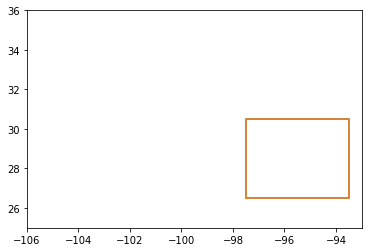

In [ ]:
import shapefile
import matplotlib.pyplot as plt

# Read in the shapefile
sf = shapefile.Reader("texas_voting_districts.shp")

# Set the limits for the x-axis and y-axis
x_lim = [-106, -93]
y_lim = [25, 36]

# Create a figure and an axis
fig, ax = plt.subplots()

# Loop through the shapes in the shapefile and plot them
for shape in sf.shapes():
    x = [point[0] for point in shape.points]
    y = [point[1] for point in shape.points]
    ax.plot(x, y)

# Set the limits for the x-axis and y-axis
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

# Show the plot
plt.show()
